# Export shock

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find steady state and Jacobian](#toc2_)    
- 3. [Find IRF](#toc3_)    
- 4. [Figures](#toc4_)    
  - 4.1. [Effect on Foreign Economy and Prices](#toc4_1_)    
  - 4.2. [Effect on Production firms, Phillips-curve and Investments](#toc4_2_)    
    - 4.2.1. [Production firms](#toc4_2_1_)    
    - 4.2.2. [Phillips-curve](#toc4_2_2_)    
    - 4.2.3. [Investments](#toc4_2_3_)    
  - 4.3. [Labor market](#toc4_3_)    
  - 4.4. [Government](#toc4_4_)    
  - 4.5. [Effect on consumption](#toc4_5_)    
  - 4.6. [Other](#toc4_6_)    
    - 4.6.1. [Households - life-cycle](#toc4_6_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

C:\Users\nbk863\AppData\Local\Temp\ipykernel_3204\2007051729.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')            #create baseline model

In [3]:
par = model.par                 #set model parameters
ss = model.ss                   #create namespace for steady state
sol = model.sol                 #create namespace for solution

In [4]:
par.t_b = 0
par.delta_B = 0
par.eta = 0.0
model.set_constant_wage(False)

## 2. <a id='toc2_'></a>[Find steady state and Jacobian](#toc0_)

In [5]:
model.find_ss()                 #find steady state 

In [6]:
model.calc_jac(do_print=True)   #calculate jacobian

Jacobian calculated in 1.0 mins 9 secs


## 3. <a id='toc3_'></a>[Find IRF](#toc0_)

In [7]:
model.set_exo_ss()              #set steady state exogenous variables

In [8]:
Tshock = 50                             #length of shock
persistence = 0.80**np.arange(Tshock)   #persistence of shock
Priceshock = 0.005                      #size of the price shock

sol.chi[:Tshock] = ss.chi*(1 + 2*Priceshock*persistence)    #The shock to chi is twice as large as the price shock 
# sol.P_F[:Tshock] = ss.P_F*(1 + Priceshock*persistence)      #Shock to the foreign price
# sol.P_M_C[:Tshock] = ss.P_M_C*(1 + Priceshock*persistence)  #Shock to the consumption import price 
# sol.P_M_G[:Tshock] = ss.P_M_G*(1 + Priceshock*persistence)  #Shock to the government consumption import price  
# sol.P_M_I[:Tshock] = ss.P_M_I*(1 + Priceshock*persistence)  #Shock to the investment import price  
# sol.P_M_X[:Tshock] = ss.P_M_X*(1 + Priceshock*persistence)  #Shock to the export import price  

In [9]:
model.find_IRF()                #find impulse response functions 

initial:
t1-t0 = 0.00407 secs
it = 3
    max. abs. error = 2.86e-12
    3.69e-14 in A_R_ini_error
    1.33e-15 in Aq_diff
    2.55e-15 in FOC_capital_agency
    8.01e-13 in FOC_K_ell
    2.86e-12 in mkt_clearing
    6.33e-14 in PC
    5.11e-15 in bargaining_cond

solve: t1-t0 = 0.14393 secs
evaluate + update: t3-t2 = 0.08417 secs


## 4. <a id='toc4_'></a>[Figures](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Effect on Foreign Economy and Prices](#toc0_)

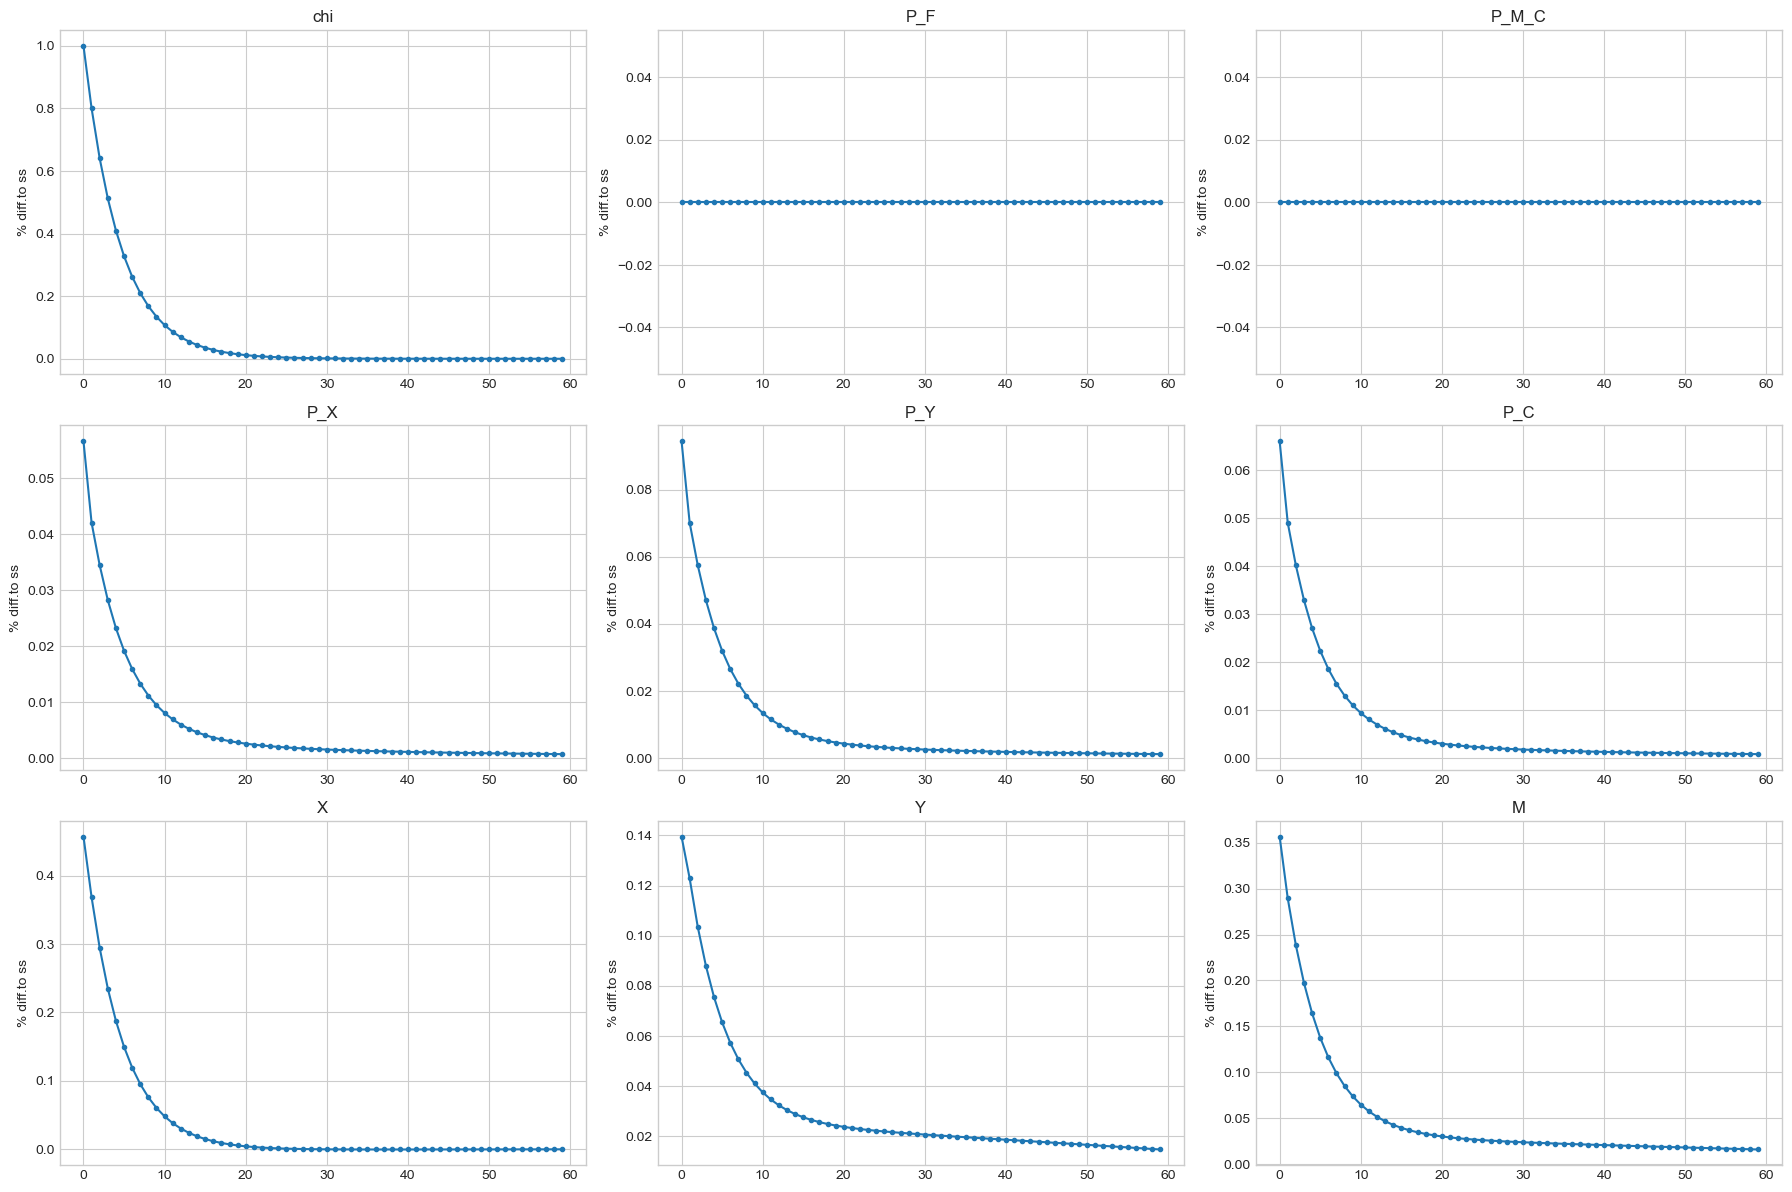

In [10]:
model.plot_IRF(varlist=['chi','P_F','P_M_C','P_X','P_Y','P_C', 'X', 'Y', 'M'])

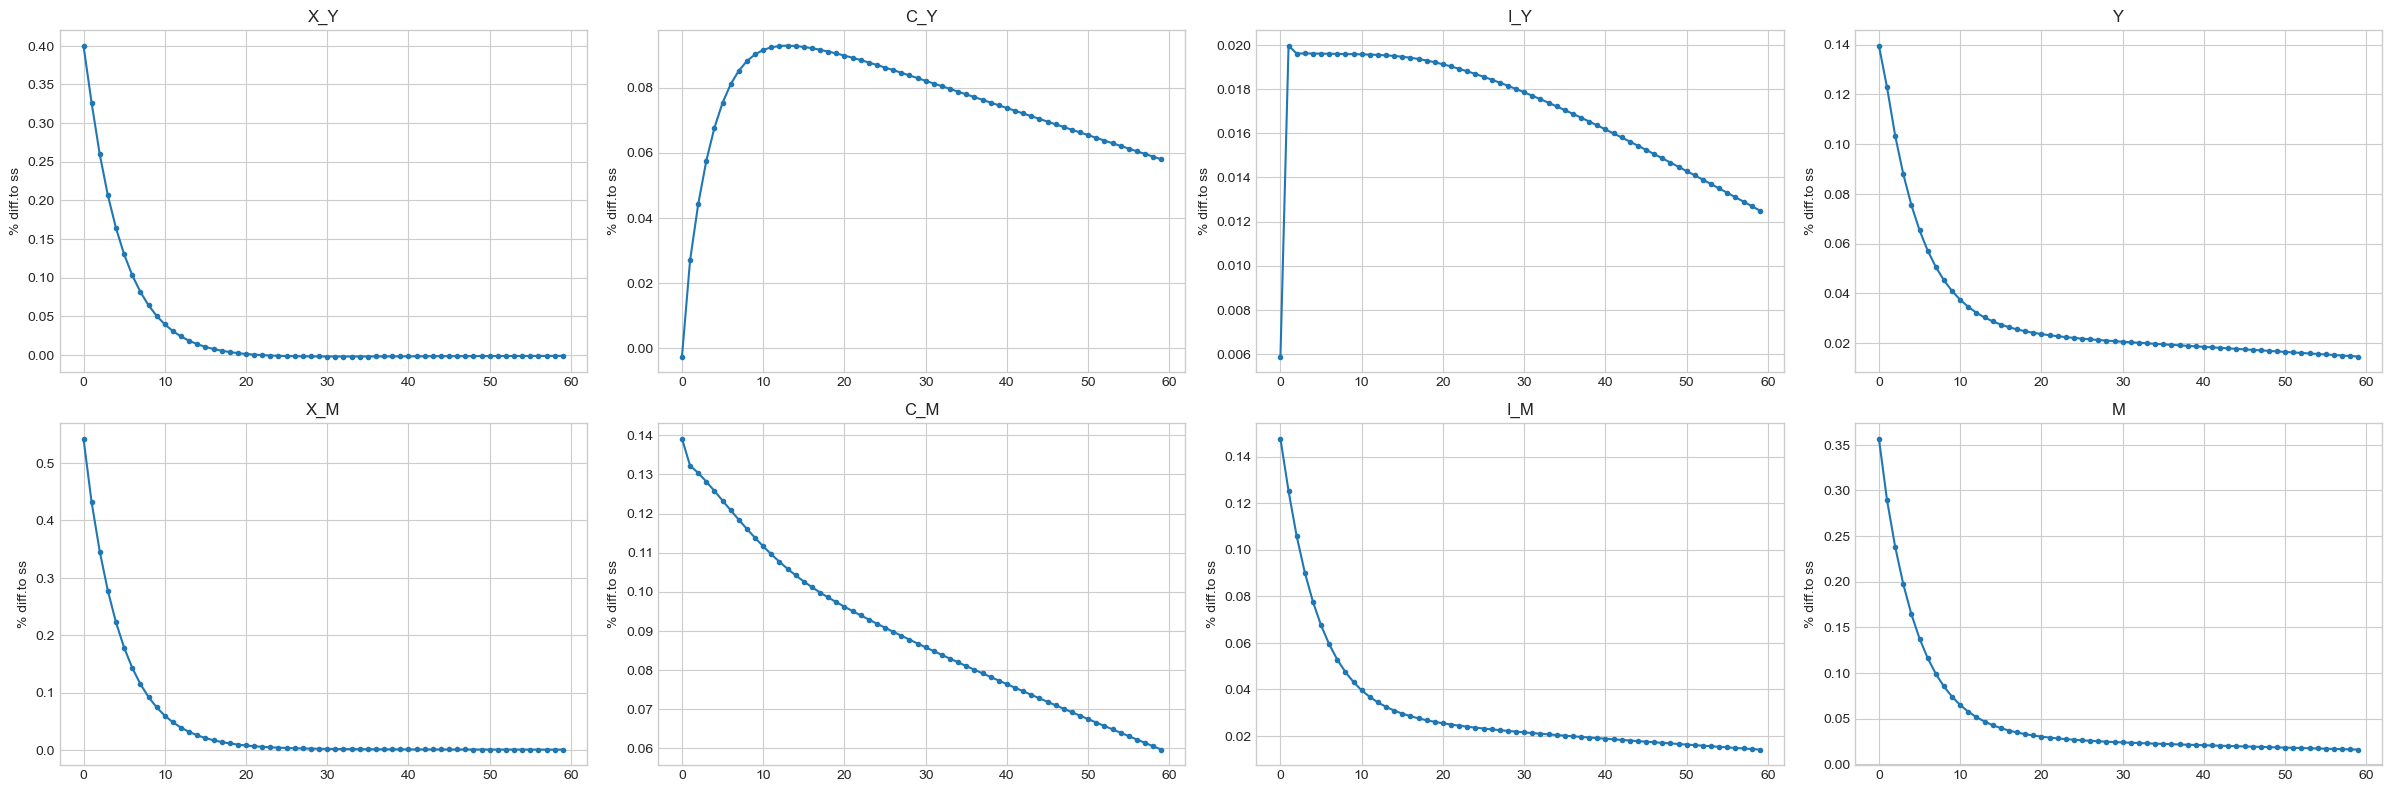

In [11]:
model.plot_IRF(varlist=['X_Y','C_Y','I_Y','Y','X_M','C_M','I_M','M'], ncol = 4)

### 4.2. <a id='toc4_2_'></a>[Effect on Production firms, Phillips-curve and Investments](#toc0_)

#### 4.2.1. <a id='toc4_2_1_'></a>[Production firms](#toc0_)

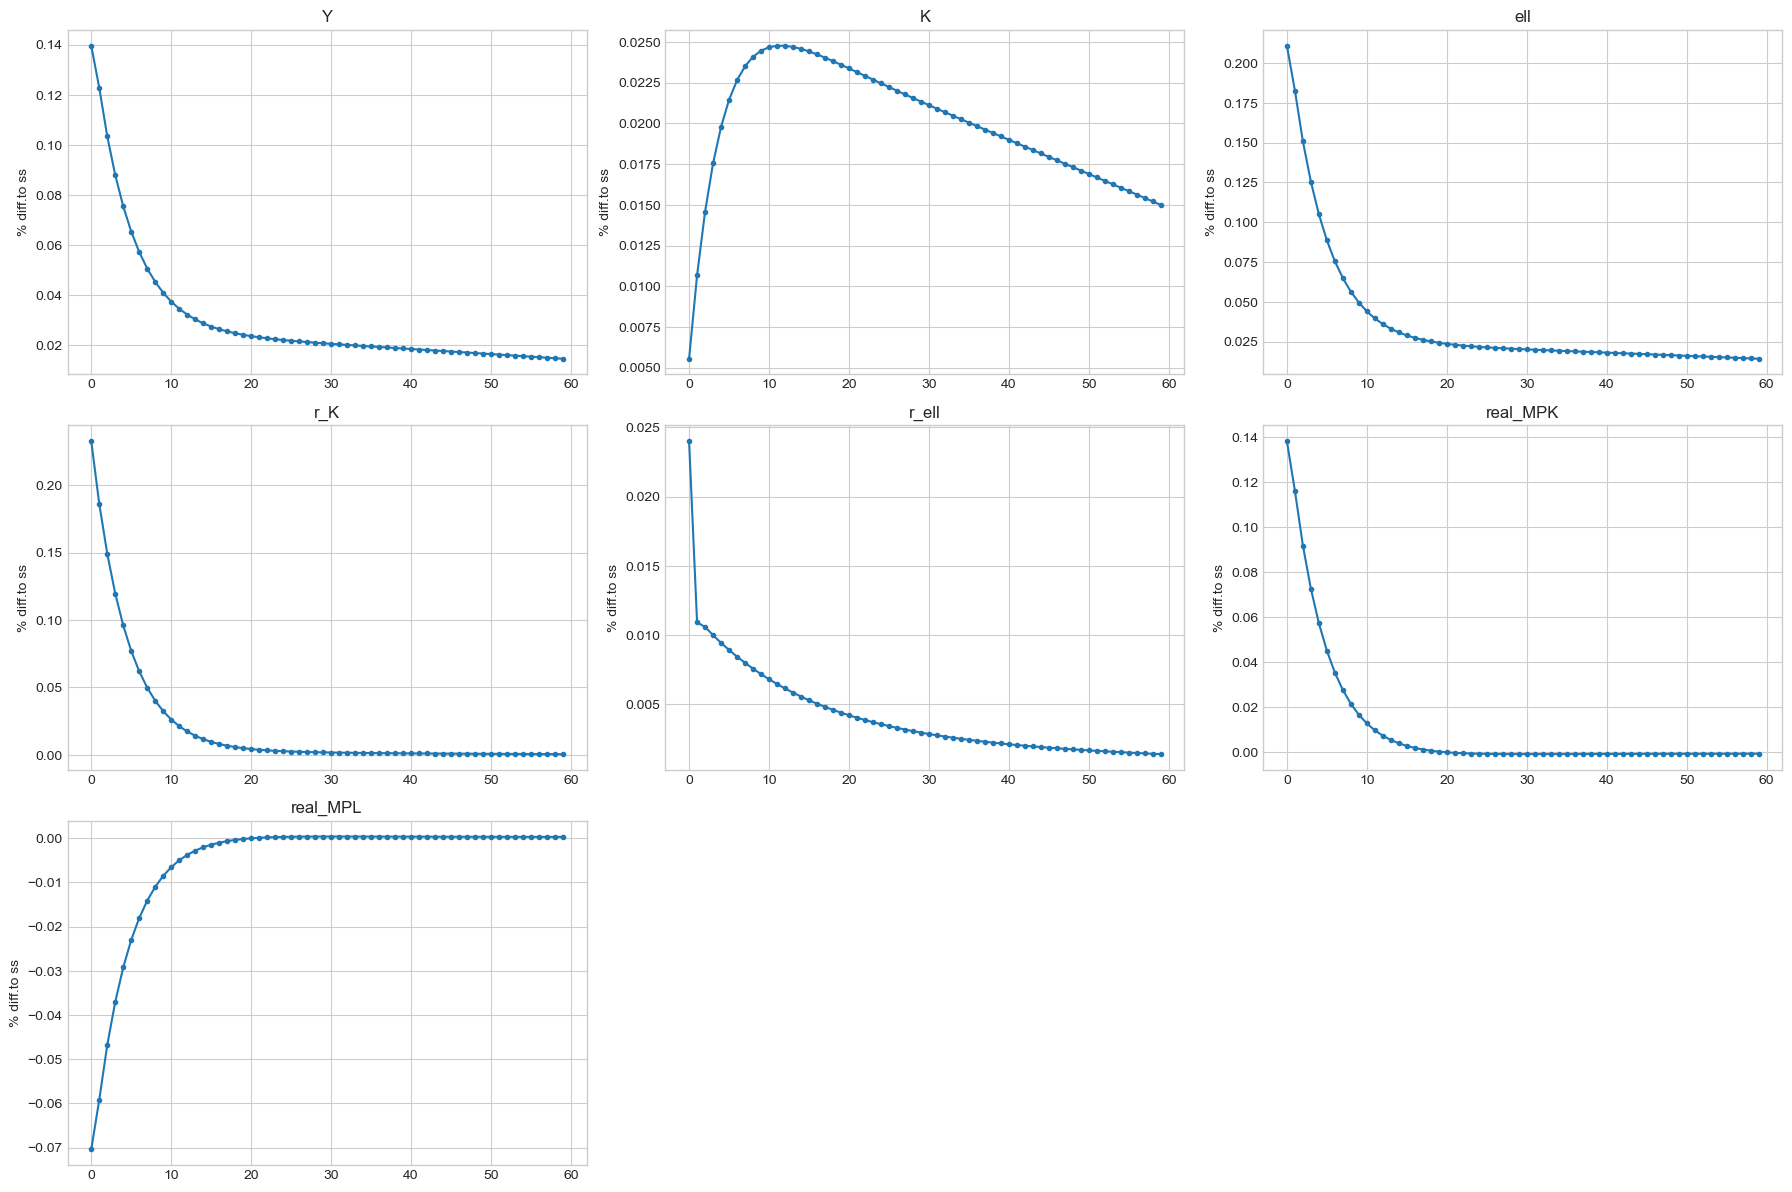

In [12]:
model.plot_IRF(varlist=['Y','K','ell','r_K','r_ell','real_MPK','real_MPL'])

#### 4.2.2. <a id='toc4_2_2_'></a>[Phillips-curve](#toc0_)

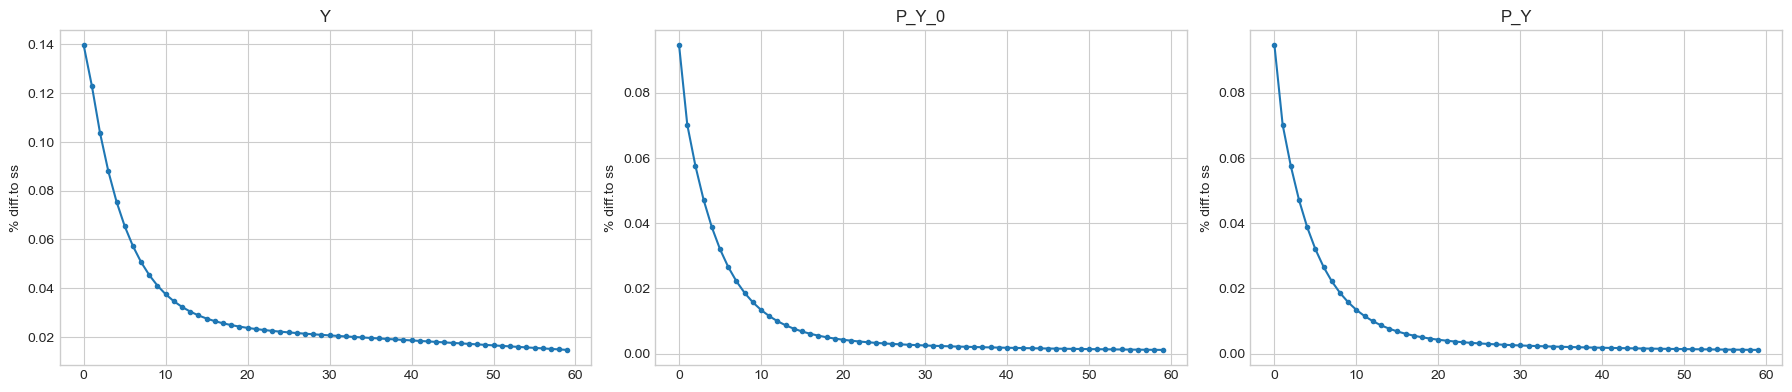

In [13]:
model.plot_IRF(varlist=['Y','P_Y_0','P_Y'])

#### 4.2.3. <a id='toc4_2_3_'></a>[Investments](#toc0_)

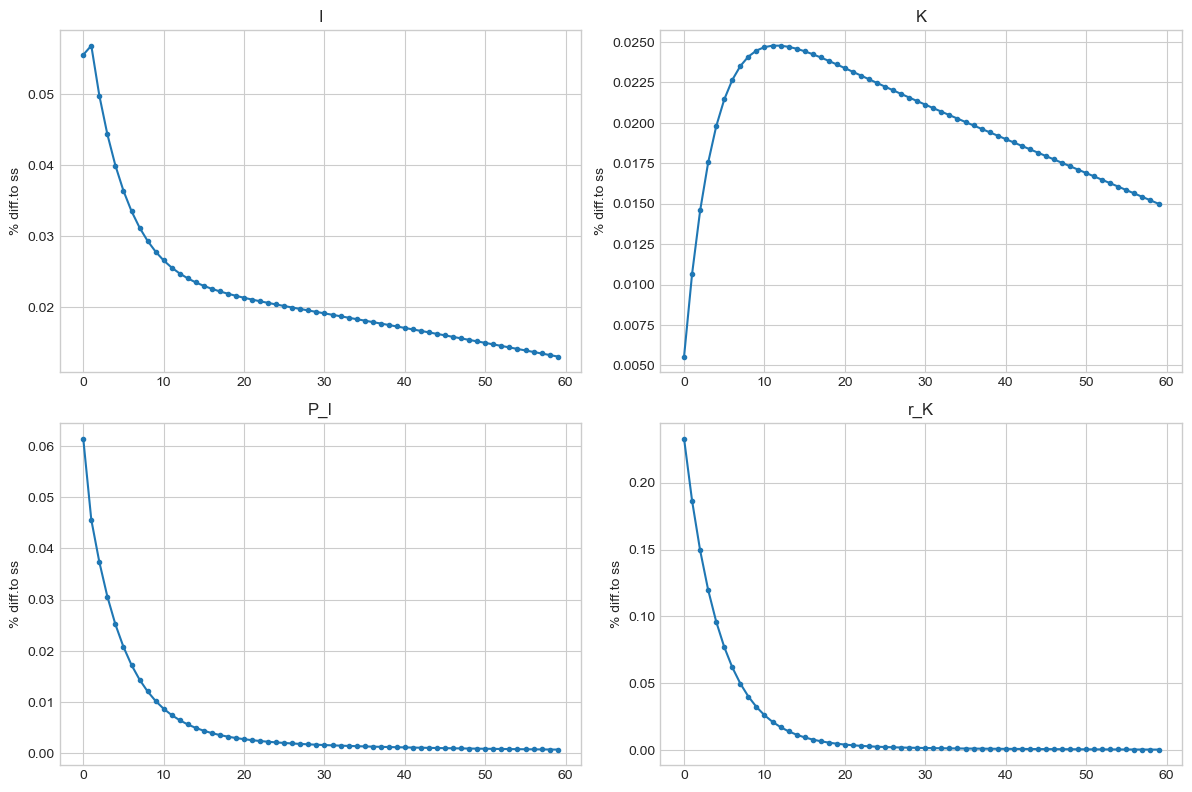

In [14]:
model.plot_IRF(varlist=['I','K','P_I','r_K'],ncol=2)

### 4.3. <a id='toc4_3_'></a>[Labor market](#toc0_)

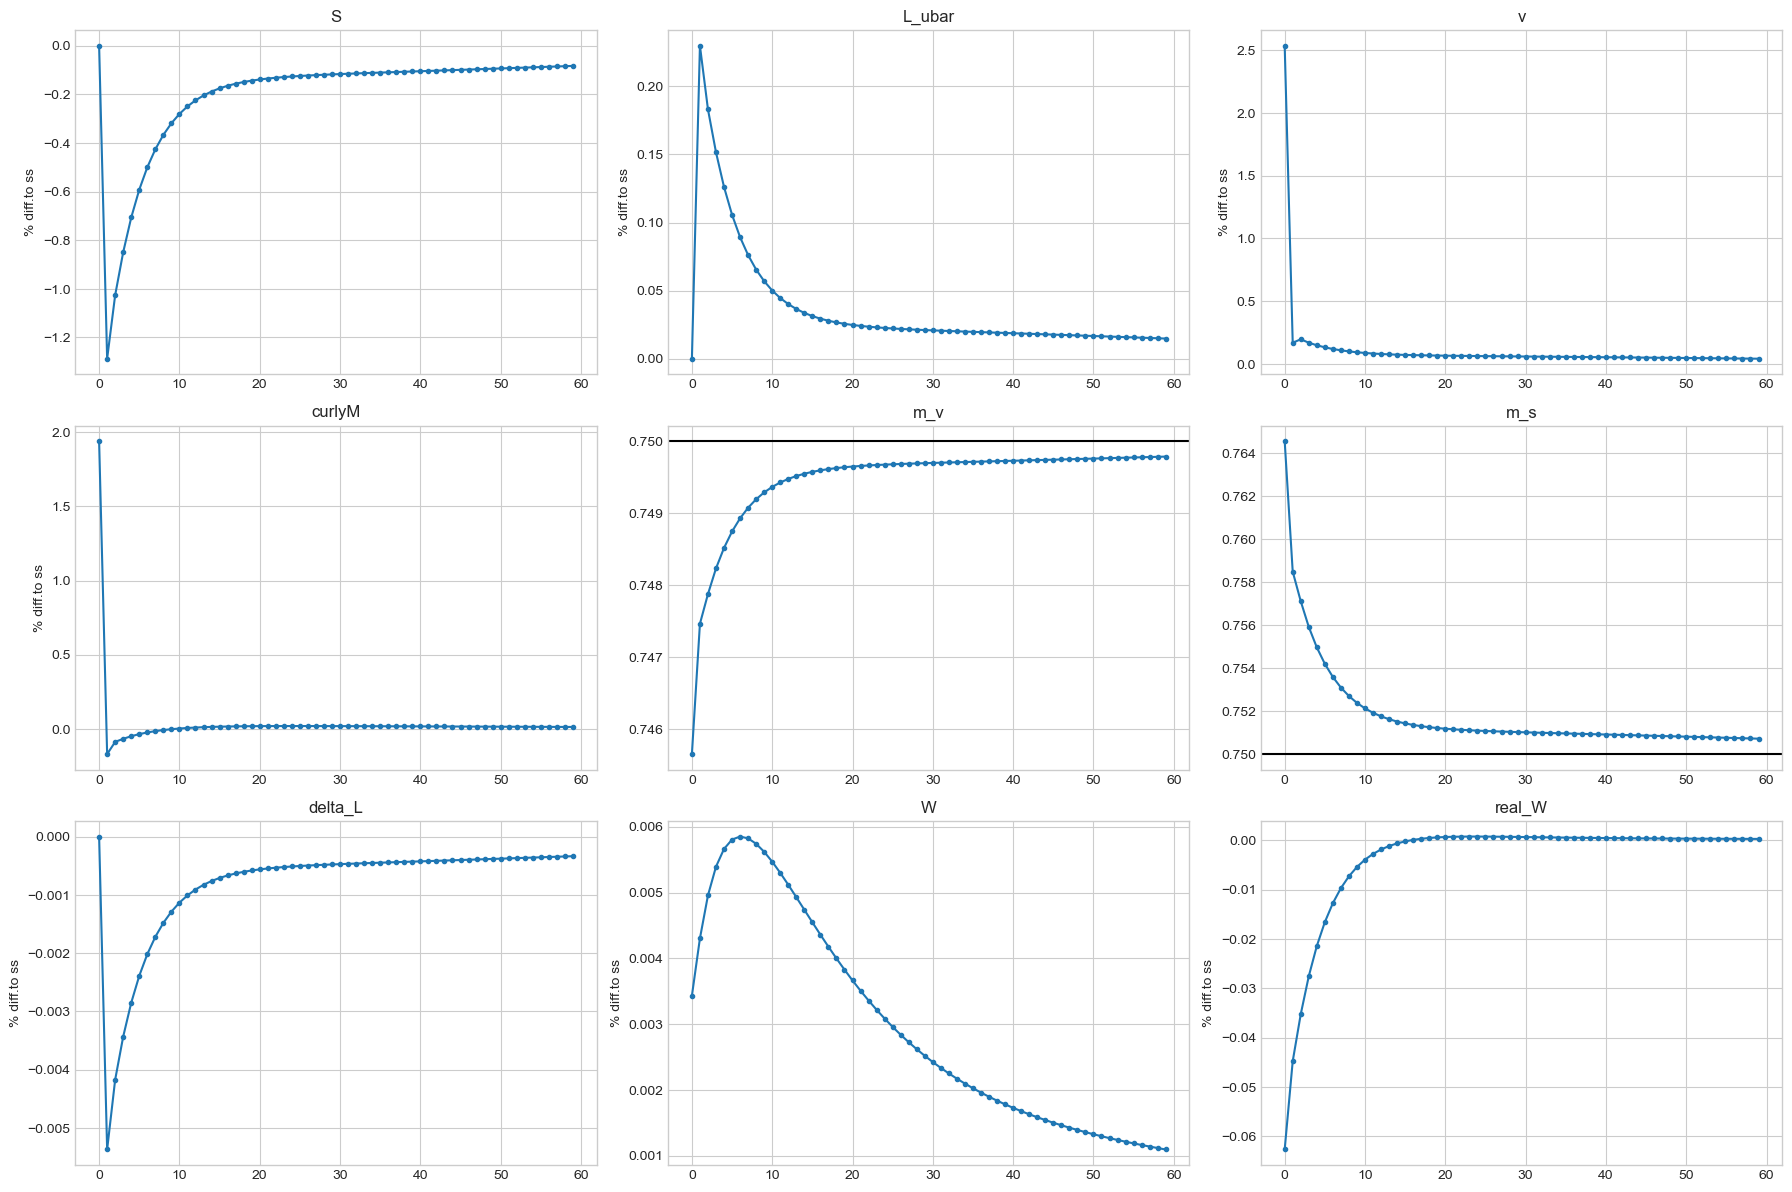

In [15]:
model.plot_IRF(varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### 4.4. <a id='toc4_4_'></a>[Government](#toc0_)

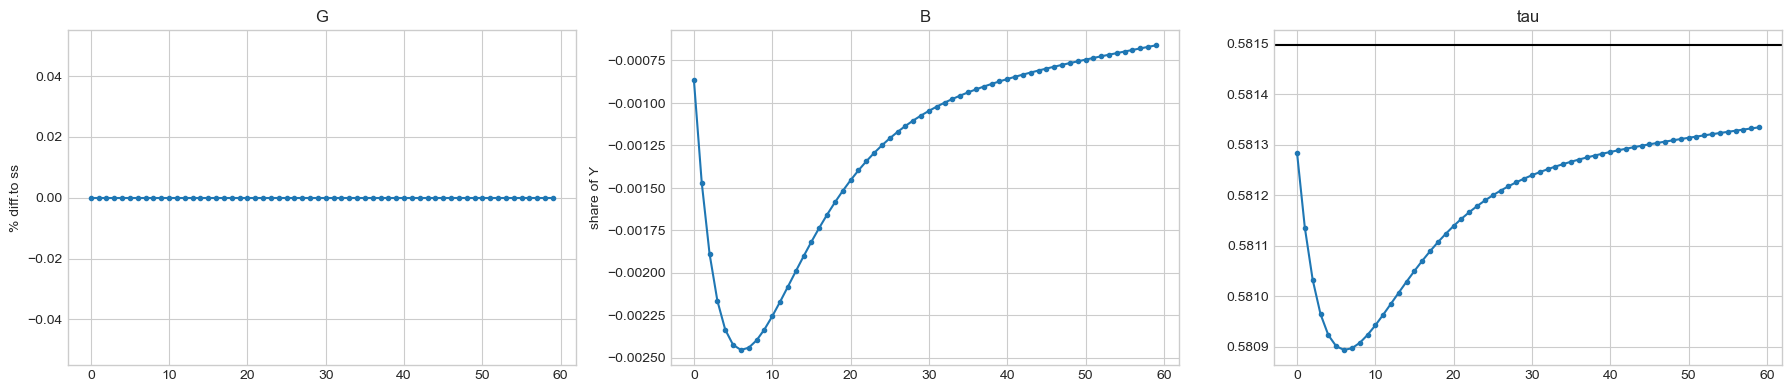

In [16]:
model.plot_IRF(varlist=['G','B','tau'],abs=['tau'],Y_share=['B'])

### 4.5. <a id='toc4_5_'></a>[Effect on consumption](#toc0_)

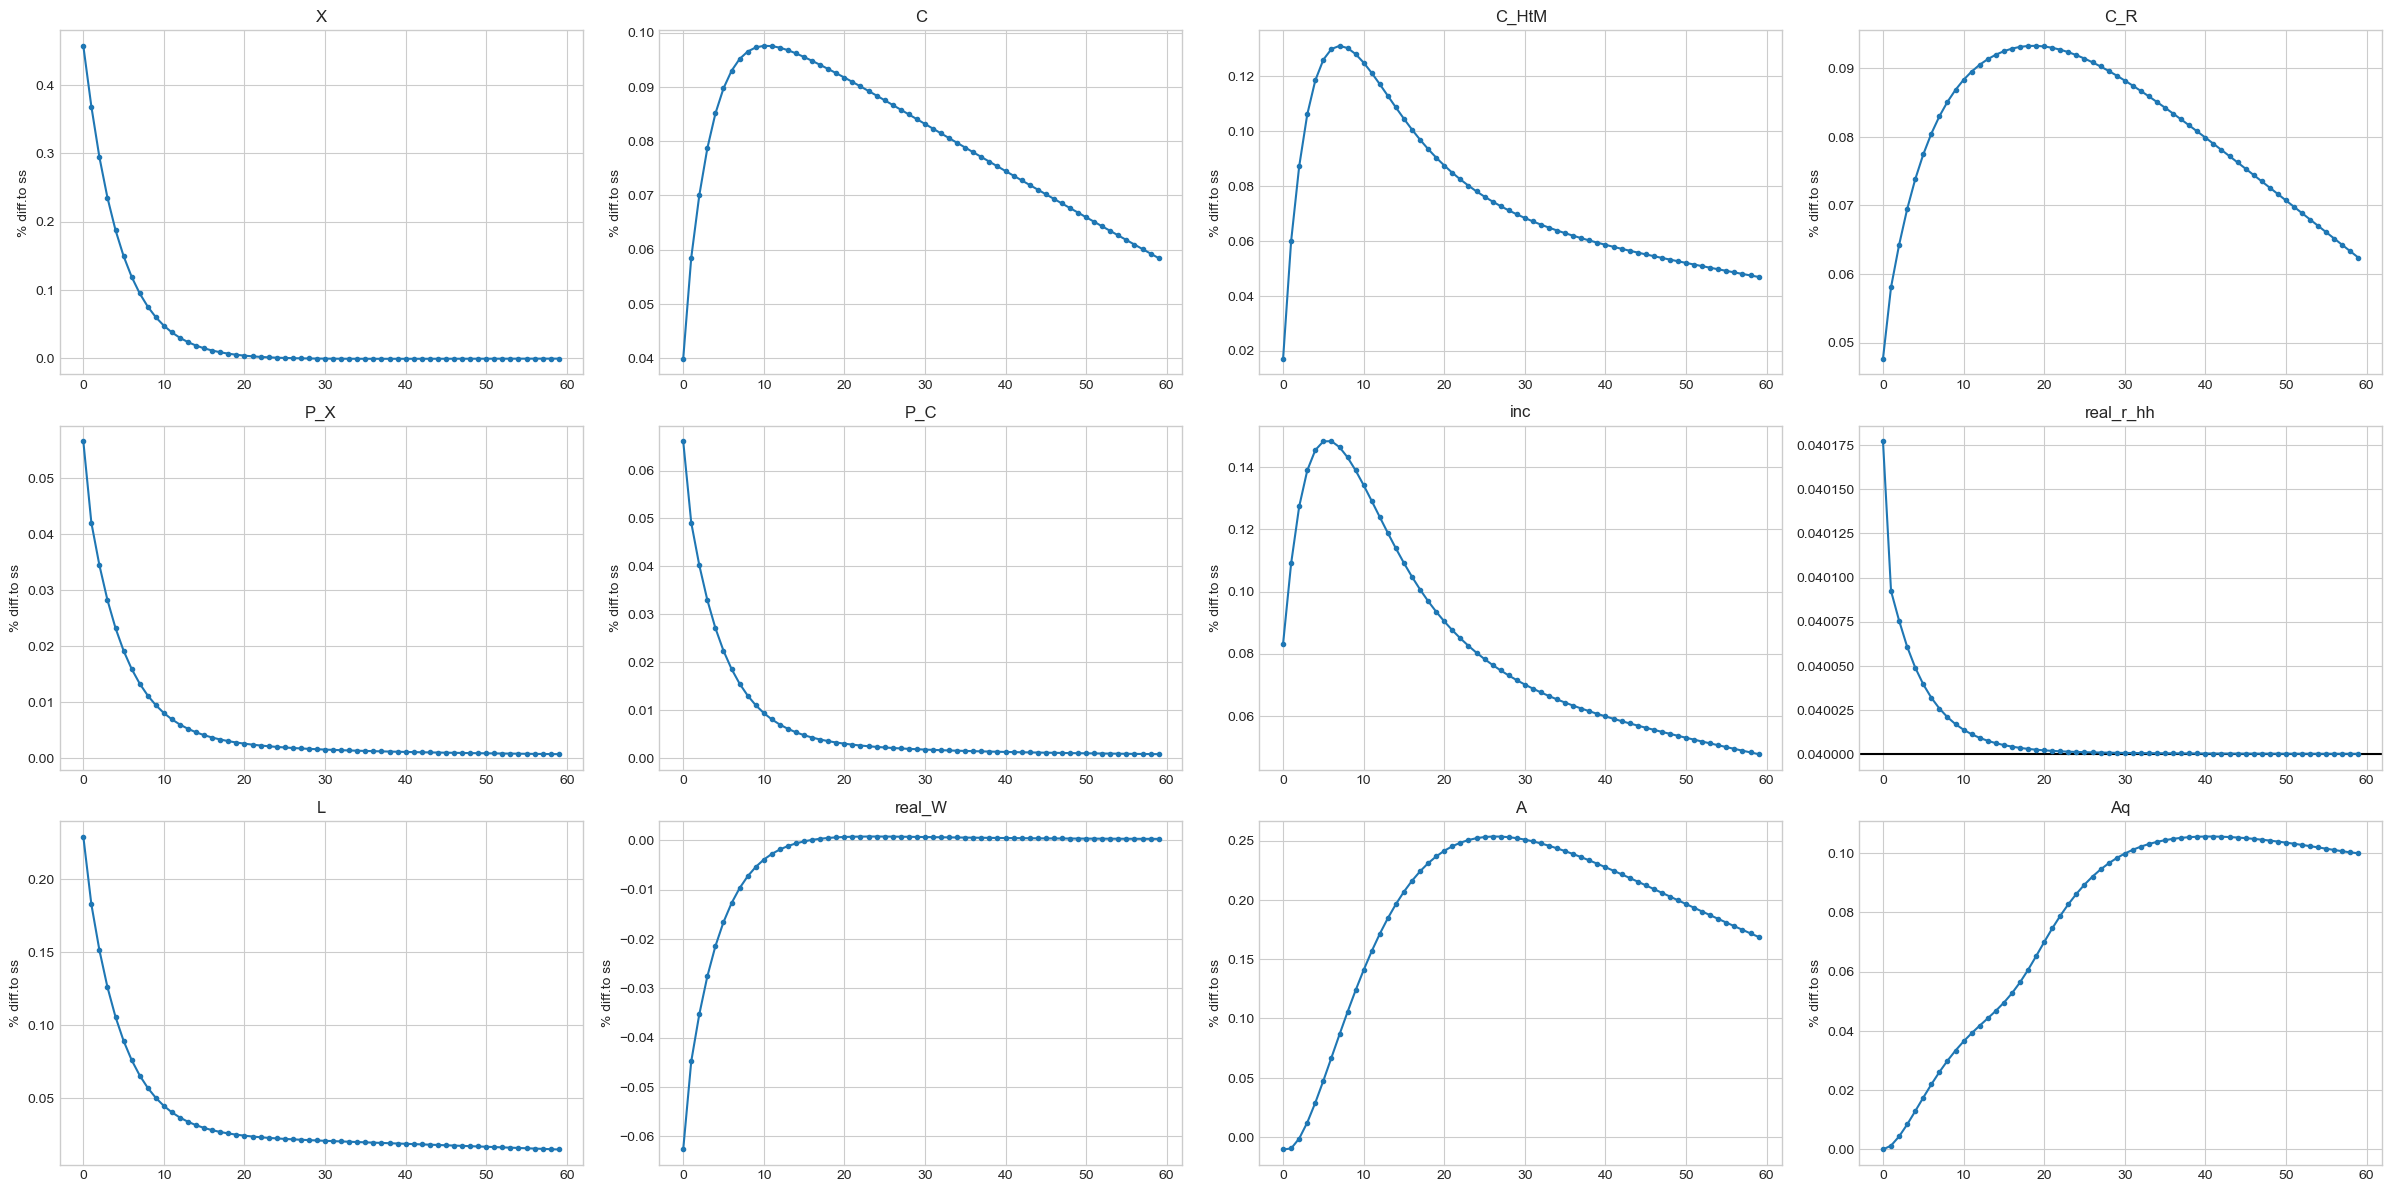

In [17]:
model.plot_IRF(varlist=['X','C','C_HtM','C_R','P_X','P_C','inc','real_r_hh','L','real_W','A','Aq'],ncol=4,abs=['real_r_hh'])

### 4.6. <a id='toc4_6_'></a>[Other](#toc0_)

#### 4.6.1. <a id='toc4_6_1_'></a>[Households - life-cycle](#toc0_)

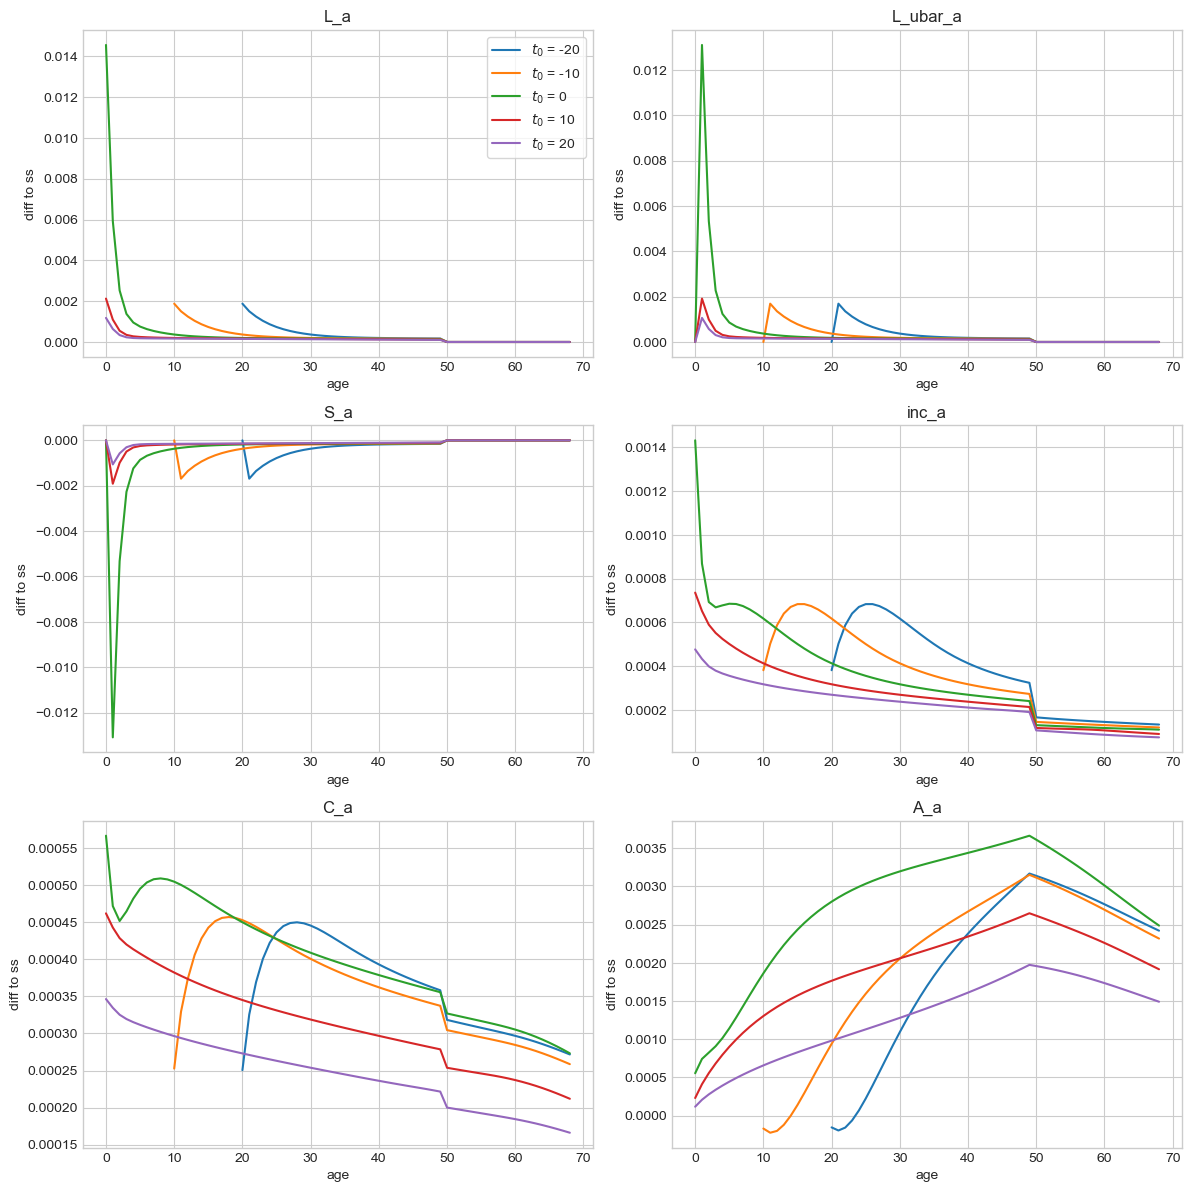

In [18]:
model.plot_IRF_hh(varlist=['L_a','L_ubar_a','S_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])